In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Businesses 

In [11]:
# Loading data 
b_data = pd.read_json('business.json', lines=True)
b_sub = b_data.sample(frac=0.01)

In [4]:
#Filtering Data

# b_data = b_data[b_data.is_open == 1]
b_sub = b_sub[b_sub.is_open == 1]

In [153]:
labels = ['Restaurants', 'restaurants','Restaurant', 'restaurant','bar','Bar','bars','Bars',
          'Food','food','Foods','foods','Dinner','dinner','Breakfast','breakfast']
def is_restaurant(x): 
    for label in labels: 
        if label in x:
            return True
    return False 

In [13]:
# Extracting restaurants
b_filt = b_sub[b_sub.categories.apply(is_restaurant)]
b_filt

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
125869,33493 Lake Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",k9v5WACEP5Khmr0HEu-EIg,"[Bars, Mexican, Nightlife, Restaurants]",Avon Lake,"{'Monday': '11:00-22:00', 'Tuesday': '11:00-22...",0,41.503811,-82.052371,Los Amigos Mexican Bar & Grill,,44012,18,4.0,OH
78144,"8010 E McDowell Rd, Ste 101",{'BusinessAcceptsCreditCards': True},jwlYt1THl6Fllqn2qRcLeQ,"[Real Estate, Real Estate Services, Home Servi...",Scottsdale,"{'Friday': '9:30-16:00', 'Tuesday': '9:30-16:0...",1,33.466606,-111.908474,KRK Realty and Management,,85257,10,4.0,AZ
66287,"3046 Don Mills Road, Unit 20","{'GoodForMeal': {'dessert': False, 'latenight'...",aeEVWgcUf1-f46Dk-EzgTQ,"[Restaurants, Food, Chinese, Desserts]",Toronto,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",1,43.785831,-79.353279,Fresh Cup Bubble Tea,,M2J 5A7,4,4.5,ON
123714,216 N Craig St,"{'RestaurantsTableService': False, 'GoodForMea...",stD-LTFFwlmBdzU-0aBntw,"[Restaurants, Pizza, Italian]",Pittsburgh,"{'Monday': '11:00-0:00', 'Tuesday': '11:00-0:0...",1,40.450632,-79.951033,Little Nipper's Pizza II,Oakland,15213,36,3.5,PA
73850,2700 West North Lane,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",HTaA1mo9cB1dXMwfJC6yKg,"[Sports Bars, Restaurants, American (New), Nig...",Phoenix,"{'Monday': '11:00-1:00', 'Tuesday': '11:00-1:0...",1,33.580348,-112.118365,Buffalo Wild Wings,,85051,164,2.5,AZ
82192,2447 Park Rd,"{'BusinessParking': {'garage': False, 'street'...",zBxbRtUcAQvE7hGsam9Agg,"[Beer, Wine & Spirits, Food]",Charlotte,"{'Monday': '16:00-22:00', 'Tuesday': '16:00-22...",1,35.196869,-80.851176,Bulldog Beer And Wine - Dilworth,,28203,28,4.5,NC
22954,"Palms Casino Resort, 4321 West Flamingo Rd","{'GoodForMeal': {'dessert': False, 'latenight'...",ltl1WFdxYcyKOCnV6llQjw,"[Dim Sum, Chinese, Restaurants]",Las Vegas,{},0,36.114539,-115.195684,Cathay House,,89103,17,2.5,NV
8613,268 Sainte Catherine Street W,"{'RestaurantsTableService': False, 'GoodForMea...",gVMu_ToZCgRSzfBm_lsuRw,"[Fast Food, Hot Dogs, Poutineries, Restaurants]",Montreal,"{'Monday': '10:30-23:00', 'Tuesday': '10:30-23...",1,45.507065,-73.566233,Restaurant Lafleur,Ville-Marie,H2X 2A1,5,4.0,QC
91536,5032 N 7th St,"{'RestaurantsTableService': False, 'GoodForMea...",_ikylomPLdTgVtE0xWR_1Q,"[Breakfast & Brunch, Restaurants, Mexican]",Phoenix,"{'Monday': '0:00-0:00', 'Tuesday': '0:00-0:00'...",1,33.510249,-112.065293,Rolberto's,,85014,23,3.5,AZ
115447,19700 One Norman Dr,"{'Ambience': {'romantic': False, 'intimate': F...",CWtRRmZRgwu62g2QV0jCJQ,"[American (Traditional), Food, Steakhouses, Re...",Cornelius,"{'Tuesday': '17:30-21:00', 'Friday': '17:30-22...",1,35.480913,-80.882426,The Steak Valet by Choplins,,28031,4,5.0,NC


In [245]:
#Number of Restaurants in top 25 cities
a = sorted([(label, len(info)) for label, info in b_filt.groupby('city')],key=lambda x: x[1],reverse=True)

In [248]:
b_filt.groupby('city').groups

{'Ajax': Int64Index([139518, 54322], dtype='int64'),
 'Anjou': Int64Index([62917], dtype='int64'),
 'Anthem': Int64Index([112662], dtype='int64'),
 'Aurora': Int64Index([13820], dtype='int64'),
 'Avondale': Int64Index([43914], dtype='int64'),
 'Bedford': Int64Index([37084], dtype='int64'),
 'Bellevue': Int64Index([46456], dtype='int64'),
 'Bradford': Int64Index([15907], dtype='int64'),
 'Brampton': Int64Index([61799, 11609, 147147, 43356, 105753], dtype='int64'),
 'Brecksville': Int64Index([75594], dtype='int64'),
 'Bridgeville': Int64Index([84038], dtype='int64'),
 'Brook Park': Int64Index([154672], dtype='int64'),
 'Brunswick': Int64Index([3694], dtype='int64'),
 'Canonsburg': Int64Index([72123], dtype='int64'),
 'Carnegie': Int64Index([89983], dtype='int64'),
 'Chagrin Falls': Int64Index([84073], dtype='int64'),
 'Champaign': Int64Index([36730, 106781, 70185, 49494], dtype='int64'),
 'Chandler': Int64Index([141415, 40276, 106526, 89175, 59915, 14611, 115347, 119976], dtype='int64'),

In [246]:
pd.DataFrame(a,columns=['City','Count']).iloc[0:25]

,City,Count
0,Toronto,60
1,Las Vegas,49
2,Phoenix,36
3,Montréal,31
4,Charlotte,24
5,Cleveland,20
6,Pittsburgh,17
7,Mississauga,15
8,Edinburgh,14
9,Stuttgart,14


In [104]:
#Number of Restaurants by Rating 
pd.DataFrame(sorted([(label, len(info))for label, info in b_filt.groupby('stars')], reverse=True),columns=['Rating','Count'])

,Rating,Count
0,5.0,29
1,4.5,71
2,4.0,123
3,3.5,126
4,3.0,81
5,2.5,39
6,2.0,28
7,1.5,10
8,1.0,4


In [51]:
# Average Restaurant Rating 
b_filt.stars.sum()/b_filt.stars.size

3.547945205479452

In [59]:
b_filt.sort_values('stars',ascending=False).query('review_count > 10')[['name','stars']]

,name,stars
154672,Express Deli,5.0
46456,Good L'Oven Cookie Shop,5.0
84125,Pagaille Café,5.0
111952,I'll Be Seeing You,5.0
104869,Cornelius Drafthouse,5.0
37434,Uptown Farmers Market,5.0
57886,Olive & Marlowe,5.0
76248,Blue Sparrow Food Truck,5.0
56536,Restaurant Épik,5.0
112730,Caracas Empanadas,5.0


In [60]:
#Restaurants with top review counts
b_filt.sort_values('review_count',ascending=False,)[['name','review_count']]

,name,review_count
135581,Noodlehead,707
127311,Rocket Burger & Subs,633
103611,Clever Koi,621
93217,Japango,564
102936,The Perfect Scoop & Boba Tea,564
23975,Blue Hound Kitchen & Cocktails,471
29359,Fairmount Bagel,461
115599,Triple 7 Restaurant & Microbrewery,455
55801,Yard House,433
137948,Izakaya Go,418


In [61]:
# Average Amount of Restaurant Reviews 
b_filt.review_count.sum()/b_filt.review_count.size

46.34637964774951

### Users 

In [19]:
u_data = pd.read_json('user.json', lines=True)
u_sub = u_data.sample(frac=0.0005)

In [28]:
u_sub.columns

Index(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'user_id', 'yelping_since'],
      dtype='object')

In [64]:
#Average Stars by Users 
u_sub.average_stars.sum()/u_sub.average_stars.size

3.6956925675675674

In [65]:
#Average Review Count by Users 
u_sub.review_count.sum()/u_sub.review_count.size

21.89358108108108

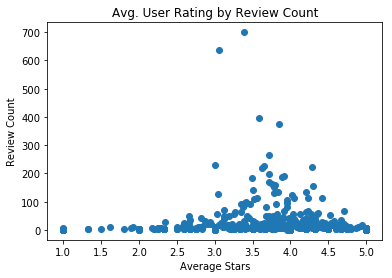

In [126]:
plt.scatter(u_sub.average_stars.values,u_sub.review_count.values)
plt.xlabel('Average Stars')
plt.ylabel('Review Count')
plt.title('Avg. User Rating by Review Count')
plt.show()

In [23]:
def get_age(x): 
    for year, month, day in (re.findall('(\d{4})-(\d{2})-(\d{2})', x)):
        days = (((2017 - int(year)) * 365) + (int(month) * 30) + int(day))
        return days


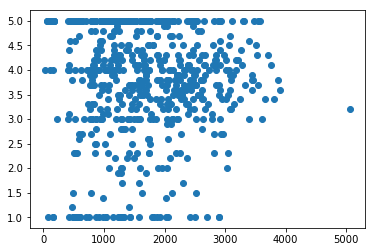

In [26]:
import re
a = u_sub.yelping_since.apply(get_age)
b = u_sub.average_stars.apply(lambda x: round(x,1))
plt.scatter(a,b)
plt.show()

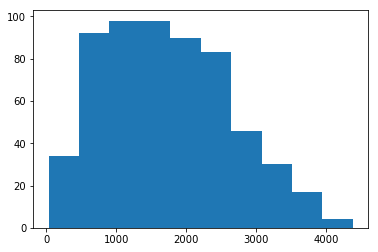

In [195]:
plt.hist(a,bins=10)
plt.show()

In [205]:
(a.sum()/a.size)/365

4.727901703072936

In [206]:
a.max()

4385

### Reviews 

In [20]:
import json

with open('review.json') as json_file:      
    data = json_file.readlines()
    # this line below may take at least 8-10 minutes of processing for 4-5 million rows. It converts all strings in list to actual json objects. 
    data = list(map(json.loads, data)) 

r_data = pd.DataFrame(data)

In [33]:
r_sub = r_data.sample(frac=0.0001)

In [34]:
r_sub.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
3810472,6YM6QTJFHP5ae1ojZsTm8Q,0,2011-07-11,0,rG6bxTB3Sn67R8J9C6AykQ,3,I wish they had more items for women's wear bu...,0,7sNE58P4AvsX6QHE8ypCiA
952013,-BbnAc9YEO6pjvJGEtFbVQ,1,2016-12-07,0,lkrAA6PooCnso3u5brKXvQ,2,I do not get the hype at all. I moved to Toron...,1,pYLoML-PFPwEn9rhpw7Tnw
1805739,OwL4BM7GchsxBXxWrkmmqw,0,2011-11-12,0,ckULHF0Zl5f9Qw6G7isepA,5,"Back in home in Washington State, I always lov...",2,VsL7I-dRjo4eToDC7Un_3Q
4692565,xee3_yzH1YP5XycJiFQAZg,0,2016-09-14,0,ai5N9n58jXz-3uTxtvaLhw,5,"Great service from ""Smitty Movers. Co-owner an...",0,omclc0ZamHiu_TXpkk2oZQ
4125117,poYsvuOmVDqF4dTnjJ780A,0,2017-06-06,0,tvCbLS0MrG_-R2_iswZTWg,5,Awesome veggie burger\nAwesome waffle :)\nGrea...,0,pqtxka7mQr08Yz79XFIl8A


In [35]:
r_sub.columns

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text',
       'useful', 'user_id'],
      dtype='object')

### Tips

In [21]:
with open('tip.json') as json_file:      
    t_data = json_file.readlines()
    t_data = list(map(json.loads, t_data)) 

In [101]:
t_data = pd.DataFrame(t_data)
t_sub = t_data.sample(frac=0.001)

In [102]:
t_sub.head()

,business_id,date,likes,text,user_id
822368,l07ctcrDMV--TYwe3uzebQ,2017-05-02,0,Gets fairly busy after 4pm on weekdays,h69CQvbyAD7JVOc5VPz0_g
225652,bxRFIGAcYREvDBT3Nw3Vaw,2014-05-20,0,"Great happy hour, awesome food choices!",0-NHIj5lIBTa2mDwTqZz8Q
713917,2NiBvT5zL272IRcxru_x9A,2016-07-08,0,Honestly very nice people but food was not goo...,XQ3hBUKYoOpSVluros6UWg
494371,Mh84_j7YmRrAcm0DWV4bUw,2013-02-01,0,Really delicious. Really Italian. I keep think...,qiA5QI85-A2WB5lKRlyCIQ
480620,O7ot_LMlCfLpOP9tBqeNfw,2013-06-08,0,"Good food, love the boat~! Lolol.",4d7PvOD51AdvX4Wr1xB-5Q


### Data Manipulation

In [155]:
b_sub = b_data.sample(frac=0.1)
b_filt = b_sub[b_sub.categories.apply(is_restaurant)]
b_preds = b_filt[['attributes','business_id','city','review_count','stars']]

In [175]:
attributes = set()
for row in b_preds.iterrows():
    for key, value in row[1][0].items():
        attributes.add(key)

In [176]:
len(sorted(attributes))

39

In [371]:
for label in attributes:
    b_preds.loc[:,label] = True 

/Users/christopherrobinson/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/christopherrobinson/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [190]:
b_preds.columns

Index(['attributes', 'business_id', 'city', 'review_count', 'stars',
       'BestNights', 'Ambience', 'HappyHour', 'RestaurantsReservations',
       'GoodForMeal', 'WheelchairAccessible', 'DriveThru', 'DogsAllowed',
       'RestaurantsGoodForGroups', 'BYOBCorkage', 'BusinessParking',
       'BikeParking', 'OutdoorSeating', 'RestaurantsTakeOut', 'Corkage',
       'RestaurantsTableService', 'DietaryRestrictions', 'WiFi', 'HasTV',
       'Caters', 'AgesAllowed', 'GoodForKids', 'RestaurantsCounterService',
       'NoiseLevel', 'RestaurantsAttire', 'CoatCheck', 'Open24Hours',
       'BusinessAcceptsCreditCards', 'BYOB', 'AcceptsInsurance',
       'HairSpecializesIn', 'GoodForDancing', 'RestaurantsDelivery', 'Smoking',
       'Alcohol', 'BusinessAcceptsBitcoin', 'RestaurantsPriceRange2', 'Music',
       'ByAppointmentOnly'],
      dtype='object')

In [336]:
cat_cols = ['BestNights', 'Ambience', 'HappyHour', 'RestaurantsReservations',
       'GoodForMeal', 'WheelchairAccessible', 'DriveThru', 'DogsAllowed',
       'RestaurantsGoodForGroups', 'BYOBCorkage', 'BusinessParking',
       'BikeParking', 'OutdoorSeating', 'RestaurantsTakeOut', 'Corkage',
       'RestaurantsTableService', 'DietaryRestrictions', 'WiFi', 'HasTV',
       'Caters', 'AgesAllowed', 'GoodForKids', 'RestaurantsCounterService',
       'NoiseLevel', 'RestaurantsAttire', 'CoatCheck', 'Open24Hours',
       'BusinessAcceptsCreditCards', 'BYOB', 'AcceptsInsurance',
       'HairSpecializesIn', 'GoodForDancing', 'RestaurantsDelivery', 'Smoking',
       'Alcohol', 'BusinessAcceptsBitcoin', 'RestaurantsPriceRange2', 'Music',
       'ByAppointmentOnly']

In [423]:
for column in ['ByAppointmentOnly']: 
    for i in range(0,(b_filt.shape[0] - 1)):
        if column in b_preds.iloc[i].attributes.keys():
            if b_preds.iloc[i].attributes[column]:
                b_preds.loc[b_preds.iloc[[i]].index.values[0],column] = 1
            elif not b_preds.iloc[i].attributes[column]:
                b_preds.loc[b_preds.iloc[[i]].index.values[0],column] = 0
            else:
                b_preds.loc[b_preds.iloc[[i]].index.values[0],column] = [b_preds.iloc[i].attributes[column]]
        else:
            b_preds.loc[b_preds.iloc[[i]].index.values[0],column] = 0         

In [425]:
b_preds

,attributes,business_id,city,review_count,stars,BestNights,Ambience,HappyHour,RestaurantsReservations,GoodForMeal,...,AcceptsInsurance,HairSpecializesIn,GoodForDancing,RestaurantsDelivery,Smoking,Alcohol,BusinessAcceptsBitcoin,RestaurantsPriceRange2,Music,ByAppointmentOnly
22786,"{'Alcohol': 'none', 'Caters': False, 'WiFi': '...",0GVu1xLqxbUQLfSCp25OGQ,Chandler,76,4.0,0,0,0,0,0,...,0,0,0,1,0,1,0,1.0,0,False
7706,"{'GoodForMeal': {'dessert': False, 'latenight'...",VXgMXIFa90rwehlRYQdf5A,Mississauga,5,4.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0.0,0,False
95462,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",ku6NGJSMJ5RwKnHrzVBQcA,Las Vegas,24,3.5,1,1,1,1,1,...,0,0,1,1,1,1,1,1.0,1,False
21608,"{'RestaurantsTableService': True, 'GoodForMeal...",bMOWg5Y6q9Cal6gWcoWEWw,Stuttgart,63,3.5,0,1,0,1,1,...,0,0,0,1,0,1,0,1.0,0,False
128227,"{'GoodForMeal': {'dessert': False, 'latenight'...",Y_UdgWtGdmetumEcS3C8bQ,Tempe,20,2.5,0,1,0,1,1,...,0,0,0,1,0,0,0,1.0,0,False
43720,"{'GoodForMeal': {'dessert': False, 'latenight'...",_7bPSTUk_FZvomYjawpdhA,Chandler,3,3.5,0,0,0,0,1,...,0,0,0,0,0,0,0,1.0,0,False
42228,"{'RestaurantsTableService': True, 'GoodForMeal...",eYgxhKL8dW4FdjOi7z6EQw,Kent,11,3.0,0,1,0,1,1,...,0,0,0,1,0,1,0,1.0,0,False
155017,"{'BusinessParking': {'garage': False, 'street'...",wyAJw8IUbreDz8RgKoUPjQ,Edinburgh,5,5.0,1,1,1,0,0,...,0,0,1,0,1,1,0,1.0,1,False
104597,"{'GoodForMeal': {'dessert': False, 'latenight'...",Es0JayHVN_XPn1q5yFtn6g,Pittsburgh,10,2.5,0,0,0,1,1,...,0,0,0,1,0,1,0,1.0,0,False
131921,"{'GoodForMeal': {'dessert': False, 'latenight'...",Lih3sCWBJRgrsERRO6--Yg,Phoenix,9,2.0,0,0,0,1,1,...,0,0,0,1,0,1,0,1.0,0,False


In [426]:
r_sub = r_data.sample(frac=0.01)

In [447]:
r_sub.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
1497637,7QX12Z9aXvkowqmbJbjsTg,0,2013-04-12,0,2gnk9Sjqz87Zwjy_u5bmfA,4,The dentist and staff were great. They were ve...,2,_ByB3h8TVa3FmGs7WiII4Q
1433441,3yMmo1sERpks50quoaA8PQ,0,2017-05-21,0,byaYF6q2gi7JQPqovZbQCQ,5,"I mean, wow. This place is a little hidden gem...",0,5JuFdzDzQmv-TvNHWSOUSg
4090102,IZivKqtHyz4-ts8KsnvMrA,1,2015-02-10,2,HeH2Zpn__8SBDb-tL7QExg,5,MY NEW FAVORITE IS THE OREO MILK TEA WITH BLAC...,1,MiiDmAzwoI0k2X_yu2Coug
4686515,CPxUsIkhYDSHqgz6sNDmqw,0,2014-08-11,0,pZQ8YvClhUlRtIhOBHZfBQ,5,"Awesome massages here, and they have some of t...",0,kL6asbH7udn5TYtnGxYRCw
715910,XDiSzQa-3WVODgF23pFAFQ,2,2012-01-25,0,nX17WwmhklGij_pTR252KA,4,Why is the Barony so often empty? It's a great...,2,g74l-c4UXDKTwHuScrO3sg


### Modeling

In [456]:
#Filters out reviews of only restaurants from large review file 
r_df = r_sub[r_sub['business_id'].isin(b_preds.business_id.values)]
r_df = r_df[['business_id','stars','user_id']]

In [460]:
#Arranges matrix UserId X BusinessID w/ rating as values
R_df = r_df.pivot(index = 'user_id', columns = 'business_id', values = 'stars').fillna(0)

In [468]:
mean_user_ratings = np.mean(R_df.as_matrix(),axis=1).reshape(-1,1)

In [465]:
#Normalized data by each user's mean and converted df to np.array
R_d = R_df.as_matrix() - mean_user_ratings

In [466]:
#For better model we need to optimize k: numer of latent features
from scipy.sparse.linalg import svds 

U, sigma, Vt = svds(R_d, k=50)

In [467]:
#Convert to diagnoal form for matrix multiplication
sigma = np.diag(sigma)

In [493]:
#Making rating predictions of restaurants for every user 
all_u_p = np.dot(np.dot(U,sigma),Vt) + user_ratings
preds_df = pd.DataFrame(all_u_p, index = R_df.index, columns = R_df.columns)

In [518]:
def recommend_restaurants(predictions_df, userID, rest_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userID 
    sorted_user_predictions = predictions_df.loc[user_row_number].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.user_id == (userID)]
    user_full = (user_data.merge(rest_df, how = 'left', left_on = 'business_id', right_on = 'business_id').
                sort_values(['stars_y'], ascending=False) 
                )

    print ('User {0} has already rated {1} restaurants.'.format(userID, user_full.shape[0]))
    print ('Recommending the highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (rest_df[~rest_df['business_id'].isin(user_full['business_id'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'business_id',
               right_on = 'business_id').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

already_rated, predictions = recommend_restaurants(preds_df, 'zMzK6SOOue3hnZCb1KO81w', b_preds, r_df, 10)

User zMzK6SOOue3hnZCb1KO81w has already rated 1 restaurants.
Recommending the highest 10 predicted ratings movies not already rated.


In [520]:
already_rated

,business_id,stars_x,user_id,attributes,city,review_count,stars_y,BestNights,Ambience,HappyHour,...,AcceptsInsurance,HairSpecializesIn,GoodForDancing,RestaurantsDelivery,Smoking,Alcohol,BusinessAcceptsBitcoin,RestaurantsPriceRange2,Music,ByAppointmentOnly
0,1HnYxHZw2icWQ7-T4AmQ0Q,5,zMzK6SOOue3hnZCb1KO81w,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",Scottsdale,125,4.0,1,1,1,...,0,0,1,1,1,1,0,1.0,1,False


In [519]:
predictions

,attributes,business_id,city,review_count,stars,BestNights,Ambience,HappyHour,RestaurantsReservations,GoodForMeal,...,AcceptsInsurance,HairSpecializesIn,GoodForDancing,RestaurantsDelivery,Smoking,Alcohol,BusinessAcceptsBitcoin,RestaurantsPriceRange2,Music,ByAppointmentOnly
6685,"{'RestaurantsTableService': True, 'GoodForMeal...",F2pfjAZ_3dMTGCKv6c5wOw,Cleveland,613,4.0,0,1,0,1,1,...,0,0,0,1,0,1,0,1.0,0,False
2594,"{'RestaurantsTableService': True, 'GoodForMeal...",vK1_qKEG7zHvjiTOsN0CRg,Tempe,617,4.5,0,1,0,1,1,...,0,0,0,1,0,1,0,1.0,0,False
994,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",ejaUQ1hYo7Q7xCL1HdPINw,Pittsburgh,858,3.5,1,1,1,1,1,...,0,0,1,1,1,1,0,1.0,1,False
1275,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",OY0-hYJ2q6WiAqhYnCZZ0w,Scottsdale,587,4.0,1,1,1,1,1,...,0,0,1,1,1,1,1,1.0,1,False
2110,"{'Alcohol': 'full_bar', 'HasTV': False, 'Noise...",dCUuzw3R2rPqKyN2Zl9zRw,Las Vegas,741,4.0,1,1,1,1,1,...,0,0,1,1,1,1,0,1.0,1,False
5351,"{'Alcohol': 'full_bar', 'HasTV': False, 'Noise...",RQTatUj2f9Nz9JViTH4aAQ,Phoenix,402,4.0,0,1,0,1,1,...,0,0,0,1,0,1,0,1.0,0,False
4154,"{'RestaurantsTableService': True, 'GoodForMeal...",rnvsL0oFZpzpO61GXqBF6g,Phoenix,267,4.5,0,1,0,1,1,...,0,0,0,1,0,1,0,1.0,0,False
1166,"{'RestaurantsTableService': False, 'GoodForMea...",wHVWfC_a6koeiJXAu78e1g,Chandler,689,4.0,0,1,0,1,1,...,0,0,0,1,0,1,1,1.0,0,False
6089,"{'RestaurantsTableService': True, 'GoodForMeal...",K-SsrPH0nFExdpLrTo1X1w,Pittsburgh,409,4.0,0,1,0,1,1,...,0,0,0,1,0,1,0,1.0,0,False
6178,"{'RestaurantsTableService': False, 'GoodForMea...",99j5vhhtFJIefXDLsmA29Q,Charlotte,210,4.5,0,1,0,1,1,...,0,0,0,1,0,1,0,1.0,0,False
